In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
from os import path as osp
import sys
# !unzip -oq "gdrive/My Drive/NTF_project/200Ra5e6data.zip" 
if not os.path.exists("500Ra3.0E+06_dt1.0E+00_SD1830312345"):
    !unzip -oq "gdrive/My Drive/NTF_project/500Ra3.0E+06_dt1.0E+00_SD1830312345.zip" -d "500Ra3.0E+06_dt1.0E+00_SD1830312345"

In [ ]:
root_dir = "gdrive/My Drive/NTF_project/DMD/src"
save_dir = "gdrive/My Drive/NTF_project"

In [ ]:
import os 
import sys
src_path = ['../src', 'src',root_dir]
for path in src_path:
    if os.path.exists(path):
        sys.path.append(path)
        print(f"src path: {path}")
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import copy
import pickle
# plt.style.use('ggplot')
import h5py
import utils_dmd
# import dmd_tools
from Pydmd.dmd import DMD
# from dmd_dev import plot_EigVal
from multiprocessing import Pool
from functools import partial
import comm_tools
import dmd_tools

from Pydmd.help_func import plot_recons_err_rank


src path: gdrive/My Drive/NTF_project/DMD/src


In [ ]:
### DMD for Tempearture  of circulation pattern of rayleigh benard convection

root_dir = "gdrive/My Drive/NTF_project/DMDmain"
file_path ='500Ra3.0E+06_dt1.0E+00_SD1830312345/data'
data_p_list = [os.path.join(file_path, f) for f in os.listdir(file_path)]
data_p_list = sorted(data_p_list)
data = []
data_ux = []
data_uy = []
for p in data_p_list:
    with h5py.File(p, "r") as f:
        d_t = f['T'][()]
        # print(f.keys())
        d_ux = f['ux'][()]
        d_uy = f['uy'][()]
    # print(f.keys())
        data.append(d_t.flatten())
        data_ux.append(d_ux.flatten())
        data_uy.append(d_uy.flatten())

with h5py.File(p, "r") as f:
     Nx = f['X_mesh'][()]
     Ny = f['Y_mesh'][()]

ny, nx = Nx.shape
data = np.stack(data,1)
data_uy = np.stack(data_uy,1)
data_ux = np.stack(data_ux,1)
# data = np.sqrt(data_ux**2 + data_uy**2)
snapshots = data

In [ ]:
# sdd

In [ ]:
data.shape

(100000, 1000)

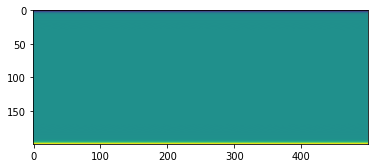

In [ ]:
plt.imshow(snapshots[:, 0].reshape(ny,nx))

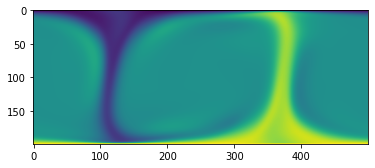

In [ ]:
plt.imshow(snapshots[:, 700].reshape(ny,nx))

In [ ]:
# ddd

In [ ]:
# data = data[:, :100]

In [ ]:
dmd_ext = DMD(svd_rank=0, exact=True, nx=nx,ny=ny)
print('fitting...')
with comm_tools.Timer('fitting'):
    dmd_ext.fit(snapshots[:,500:])
#         dmd_p.fit(snapshots)
print('fitted')
# else:
#     print('fitting VORLL...')
#     dt = 1
#     # dt = t[1] - t[0]
#     with comm_tools.Timer('fitting'):
#         dmd.fit(VORLL_data)
#     print('fitted')

fitting...
Input data matrix X has condition number 3365919.8274650034. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
[fitting]
Elapsed: 22.075441360473633
fitted


In [ ]:
dmd_ext.modes.shape

(100000, 226)

In [ ]:
r_svd = dmd_ext.r_svd 
dmd_amplitudes = dmd_ext.amplitudes
cri16_idx = dmd_ext.item_sort_idx('cri16')
eigval = dmd_ext.eigs[cri16_idx]

sort_method: cri16


In [ ]:
dmd_ext.item_sort_idx('cri16')

sort_method: cri16


array([181, 182, 183, 171, 172, 203, 202, 184, 185, 139, 140, 169, 170,
       224, 225, 141, 142, 201, 200, 127, 128, 165, 166, 167, 168, 219,
       218, 188, 189, 103, 104, 132, 131, 157, 158, 195, 194, 192, 193,
       196, 197, 222, 223, 205, 204, 144, 143, 130, 129, 138, 137, 151,
       152, 163, 164, 187, 186, 180, 179, 177, 178, 175, 176, 199, 198,
        72,  73, 159, 160, 221, 220,  96,  95, 209, 208,  99, 100, 173,
       174, 126, 125, 136, 135,  93,  94, 155, 156, 191, 190, 161, 162,
        92,  91, 102, 101, 210, 211, 212, 213, 207, 206, 119, 120, 150,
       149, 217, 216,  65,  64, 114, 113, 123, 124, 118, 117, 116, 115,
        89,  90, 154, 153,  86,  85, 134, 133, 146, 145,  82,  83, 122,
       121,  97,  98,  60,  61, 148, 147,  81,  80,  66,  67, 215, 214,
       109, 110,  70,  71,  75,  74, 112, 111,  79,  78,  88,  87, 108,
       107, 106, 105,  46,  47,  77,  76,  57,  56,  52,  53,  59,  58,
        62,  63,  42,  43,  36,  37,  48,  49,  34,  35,  68,  6

In [ ]:
cri16_idx

array([181, 182, 183, 171, 172, 203, 202, 184, 185, 139, 140, 169, 170,
       224, 225, 141, 142, 201, 200, 127, 128, 165, 166, 167, 168, 219,
       218, 188, 189, 103, 104, 132, 131, 157, 158, 195, 194, 192, 193,
       196, 197, 222, 223, 205, 204, 144, 143, 130, 129, 138, 137, 151,
       152, 163, 164, 187, 186, 180, 179, 177, 178, 175, 176, 199, 198,
        72,  73, 159, 160, 221, 220,  96,  95, 209, 208,  99, 100, 173,
       174, 126, 125, 136, 135,  93,  94, 155, 156, 191, 190, 161, 162,
        92,  91, 102, 101, 210, 211, 212, 213, 207, 206, 119, 120, 150,
       149, 217, 216,  65,  64, 114, 113, 123, 124, 118, 117, 116, 115,
        89,  90, 154, 153,  86,  85, 134, 133, 146, 145,  82,  83, 122,
       121,  97,  98,  60,  61, 148, 147,  81,  80,  66,  67, 215, 214,
       109, 110,  70,  71,  75,  74, 112, 111,  79,  78,  88,  87, 108,
       107, 106, 105,  46,  47,  77,  76,  57,  56,  52,  53,  59,  58,
        62,  63,  42,  43,  36,  37,  48,  49,  34,  35,  68,  6

In [ ]:
amp_idx = dmd_ext.item_sort_idx('amp')

sort_method: amp


In [ ]:
## optimal hard thresholding svd
r_svd

226

In [ ]:
dt = 1
t = dt* np.arange(0, dmd_ext.snapshots_shape[1])
# dt = t[1] - t[0]
dmd_ext.original_time['t0'] = t[0]
dmd_ext.original_time['dt'] = dt
dmd_ext.original_time['tend'] = t[-1]

dmd_ext.dmd_time['t0'] = t[0]
dmd_ext.dmd_time['dt'] = 1
dmd_ext.dmd_time['tend'] = t[-1]

sort_method: cri16
sort_method: cri16


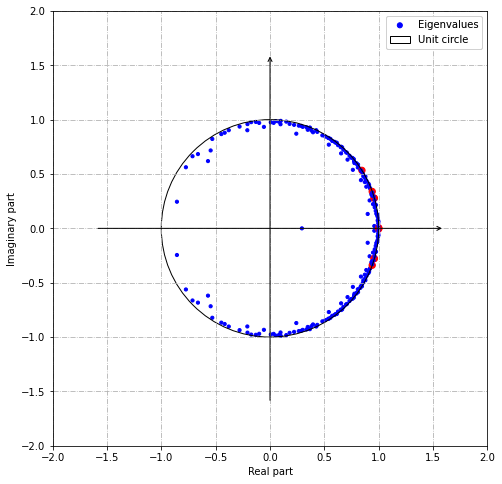

In [ ]:
dmd_ext.plot_eigs(sort_mode='cri16')

sort_method: amp
sort_method: amp


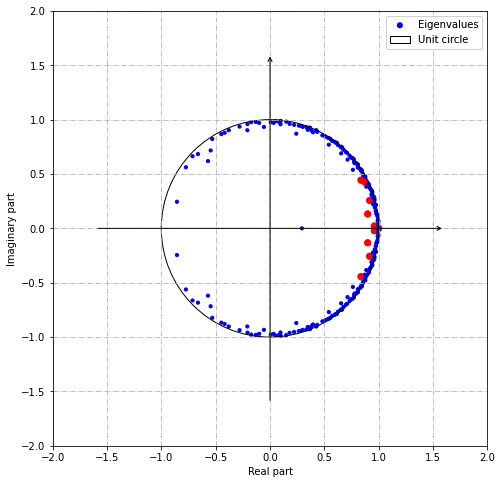

In [ ]:
dmd_ext.plot_eigs(sort_mode='amp')

sort_method: amp
sort_method: amp
(226,)
sort_method: amp


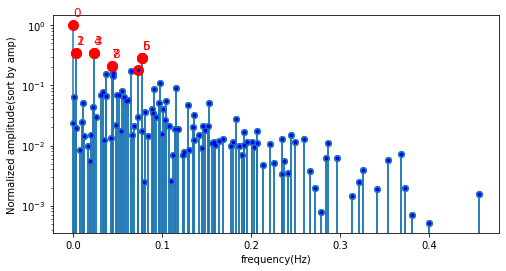

In [ ]:
dmd_ext.plot_freq(n_sig=10, sort_mode='amp')

sort_method: cri16
sort_method: cri16
(226,)
sort_method: cri16


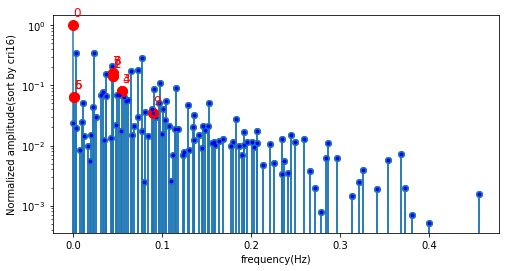

In [ ]:
dmd_ext.plot_freq(n_sig=10, sort_mode='cri16')

sort_method: cri16
sort_method: cri16


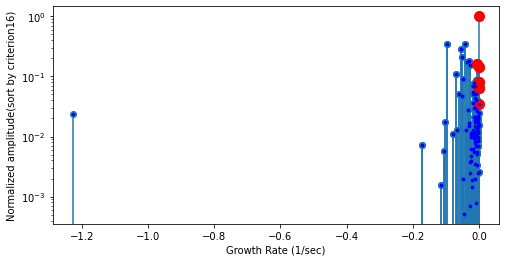

In [ ]:
dmd_ext.plot_growthrate(n_sig=10, sort_mode='cri16')

sort_method: amp
sort_method: amp


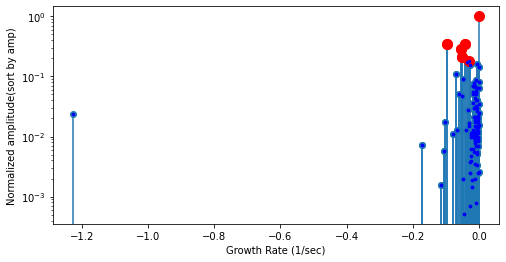

In [ ]:
dmd_ext.plot_growthrate( sort_mode='amp')

In [ ]:
dmd_ext.dynamics.shape

(226, 500)

In [ ]:
# dmd_ext.compare_mode_cri(N=240)

In [ ]:
Nc = 5
Nr= 15

In [ ]:
vmax_real = dmd_ext.modes.real.max()
vmin_real = dmd_ext.modes.real.min()
vmax_img = dmd_ext.modes.imag.max()
vmin_img = dmd_ext.modes.imag.min()

vmax_abs = abs(dmd_ext.modes).max()
# vmin_abs = abs(dmd.modes).min()
vmin_abs = 0

In [ ]:
vmax_real

0.025021226600506975

In [ ]:
vmin_real

-0.03004529704644682

In [ ]:
cri16_idx=dmd_ext.item_sort_idx(m='cri16')

sort_method: cri16


In [ ]:
cri16_idx

array([181, 182, 183, 171, 172, 203, 202, 184, 185, 139, 140, 169, 170,
       224, 225, 141, 142, 201, 200, 127, 128, 165, 166, 167, 168, 219,
       218, 188, 189, 103, 104, 132, 131, 157, 158, 195, 194, 192, 193,
       196, 197, 222, 223, 205, 204, 144, 143, 130, 129, 138, 137, 151,
       152, 163, 164, 187, 186, 180, 179, 177, 178, 175, 176, 199, 198,
        72,  73, 159, 160, 221, 220,  96,  95, 209, 208,  99, 100, 173,
       174, 126, 125, 136, 135,  93,  94, 155, 156, 191, 190, 161, 162,
        92,  91, 102, 101, 210, 211, 212, 213, 207, 206, 119, 120, 150,
       149, 217, 216,  65,  64, 114, 113, 123, 124, 118, 117, 116, 115,
        89,  90, 154, 153,  86,  85, 134, 133, 146, 145,  82,  83, 122,
       121,  97,  98,  60,  61, 148, 147,  81,  80,  66,  67, 215, 214,
       109, 110,  70,  71,  75,  74, 112, 111,  79,  78,  88,  87, 108,
       107, 106, 105,  46,  47,  77,  76,  57,  56,  52,  53,  59,  58,
        62,  63,  42,  43,  36,  37,  48,  49,  34,  35,  68,  6

In [ ]:
value_amp_real = dmd_ext.modes[:, cri16_idx[:Nc*Nr]].real.T
values_real = np.reshape(value_amp_real, (-1, ny, nx))
# dmd_tools.plot_dmd_item(values_real, Nr, Nc, -vmax_real, vmax_real, title='real part of mode')

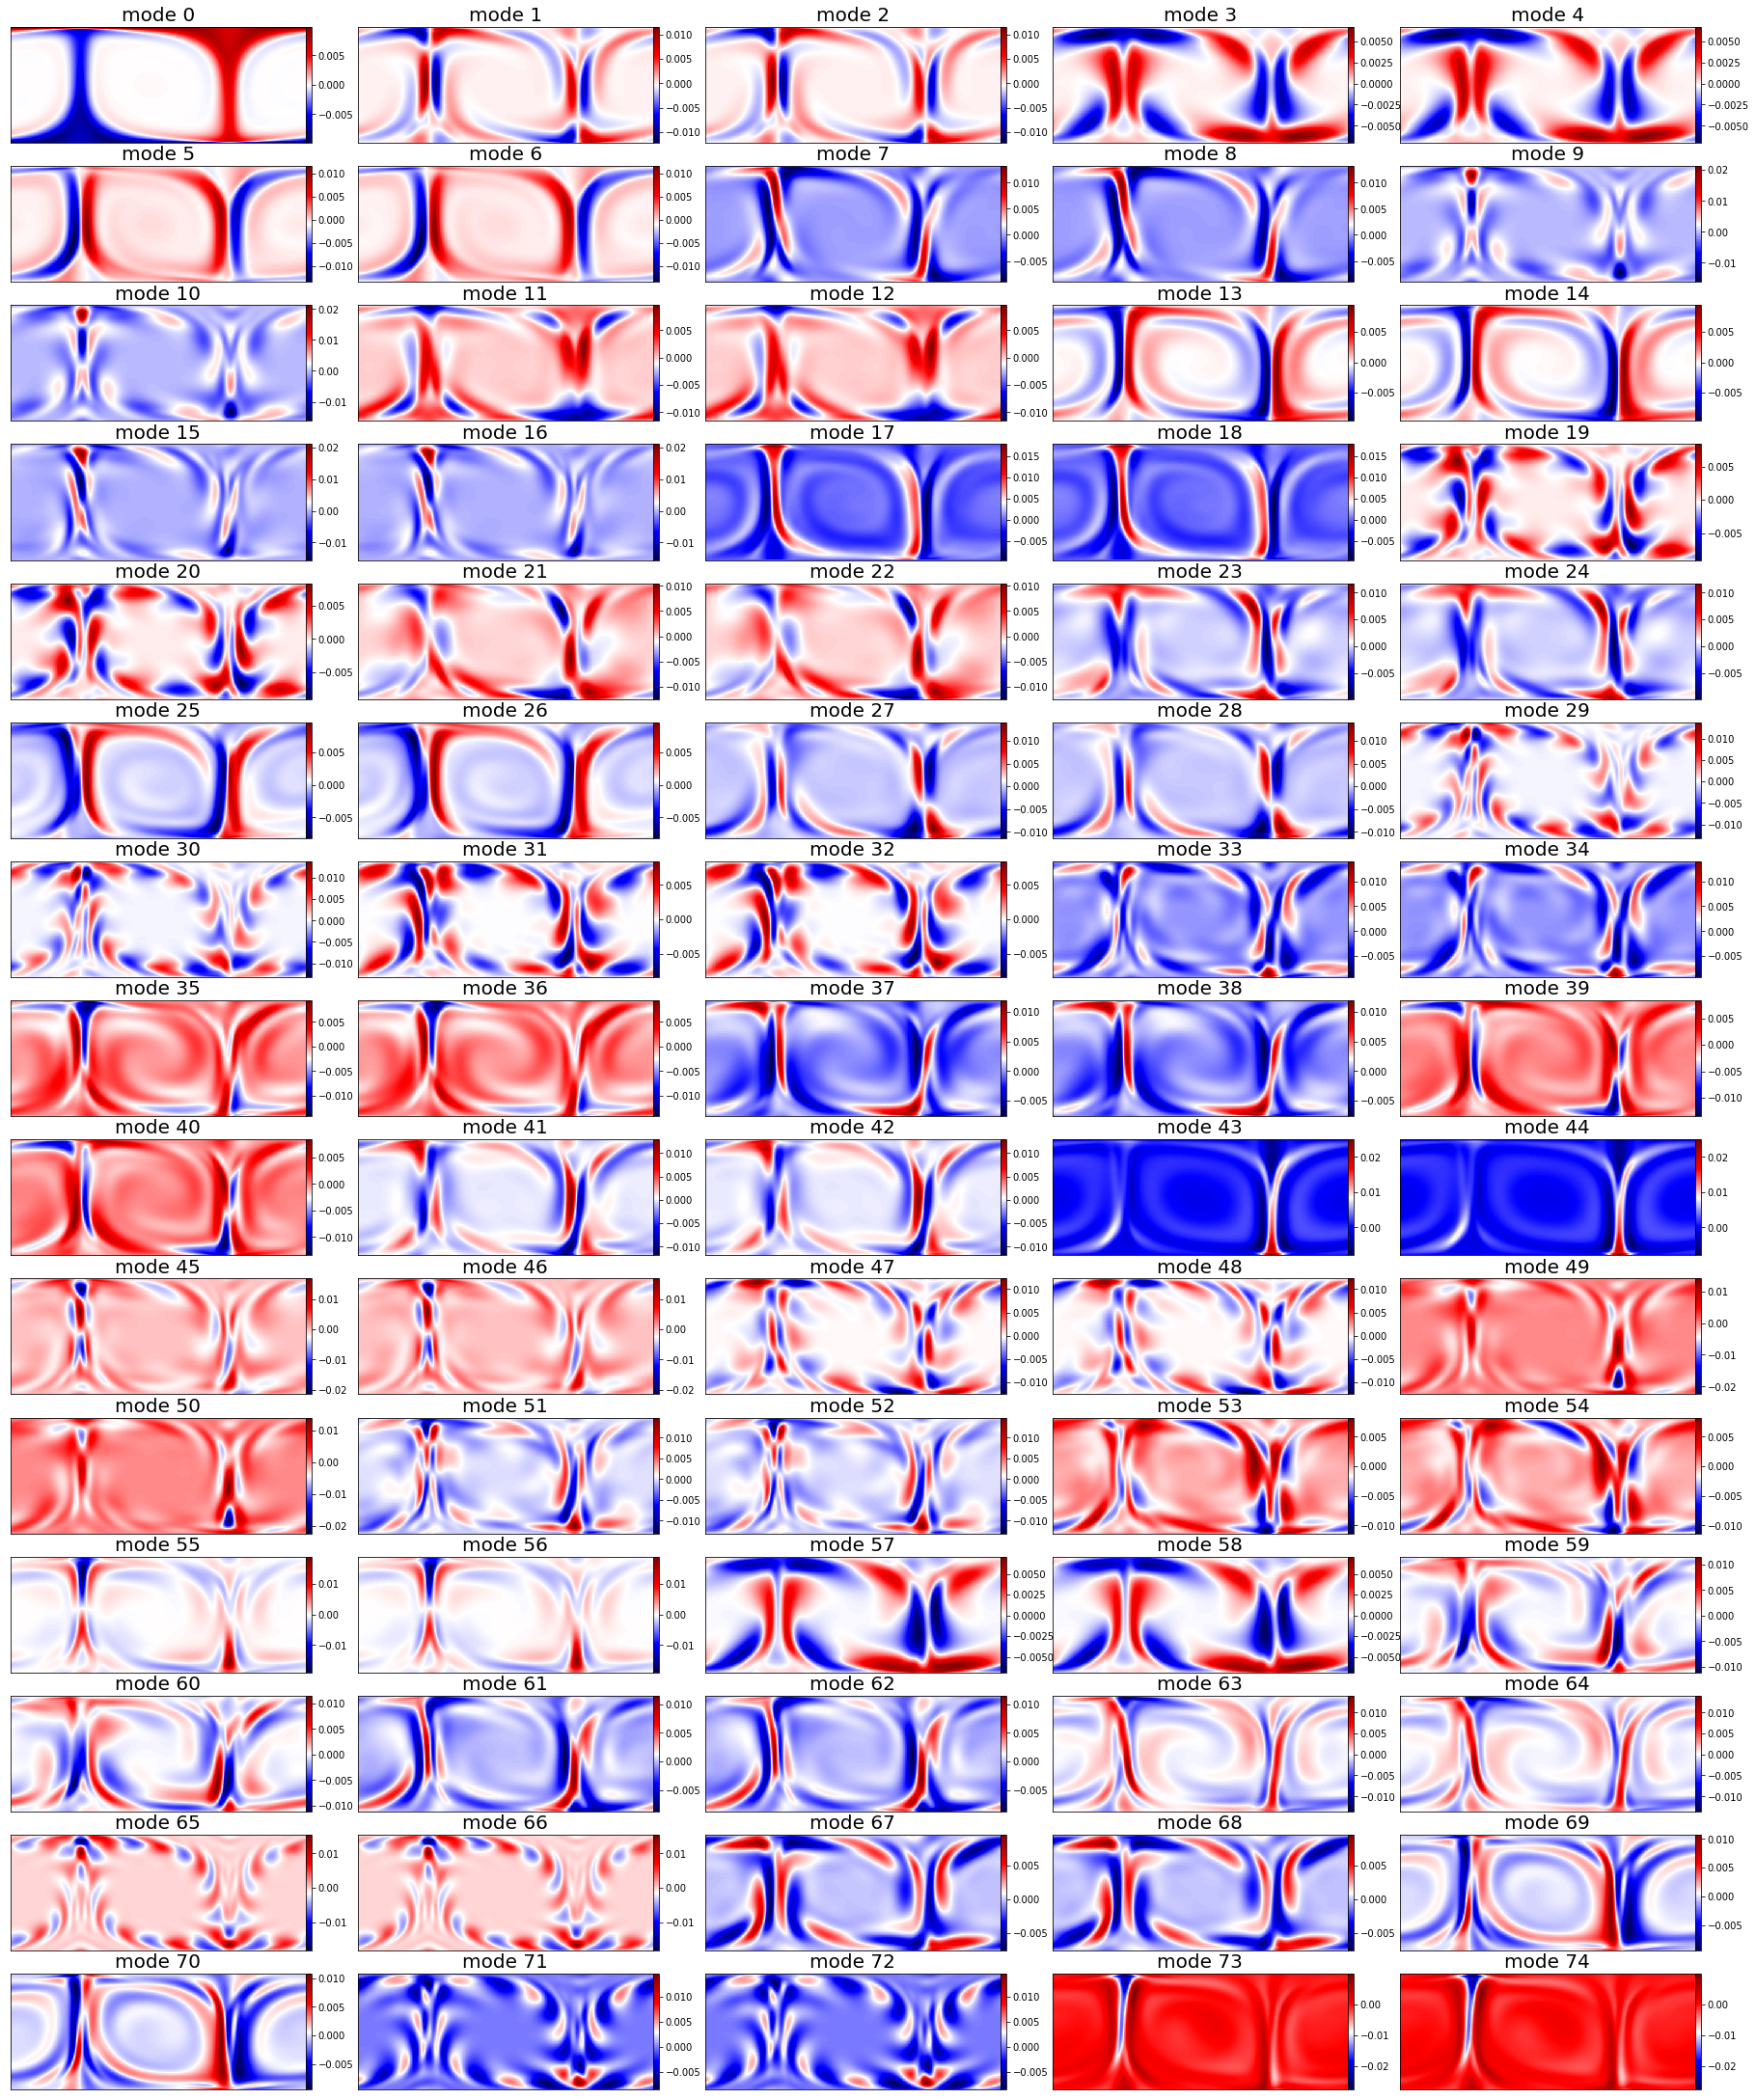

In [ ]:
dmd_tools.plot_dmd_item(values_real, Nr, Nc, cmap='seismic', title='real part of mode', save_fig=True,  png_name=osp.join(save_dir, 'Treal3.png'))

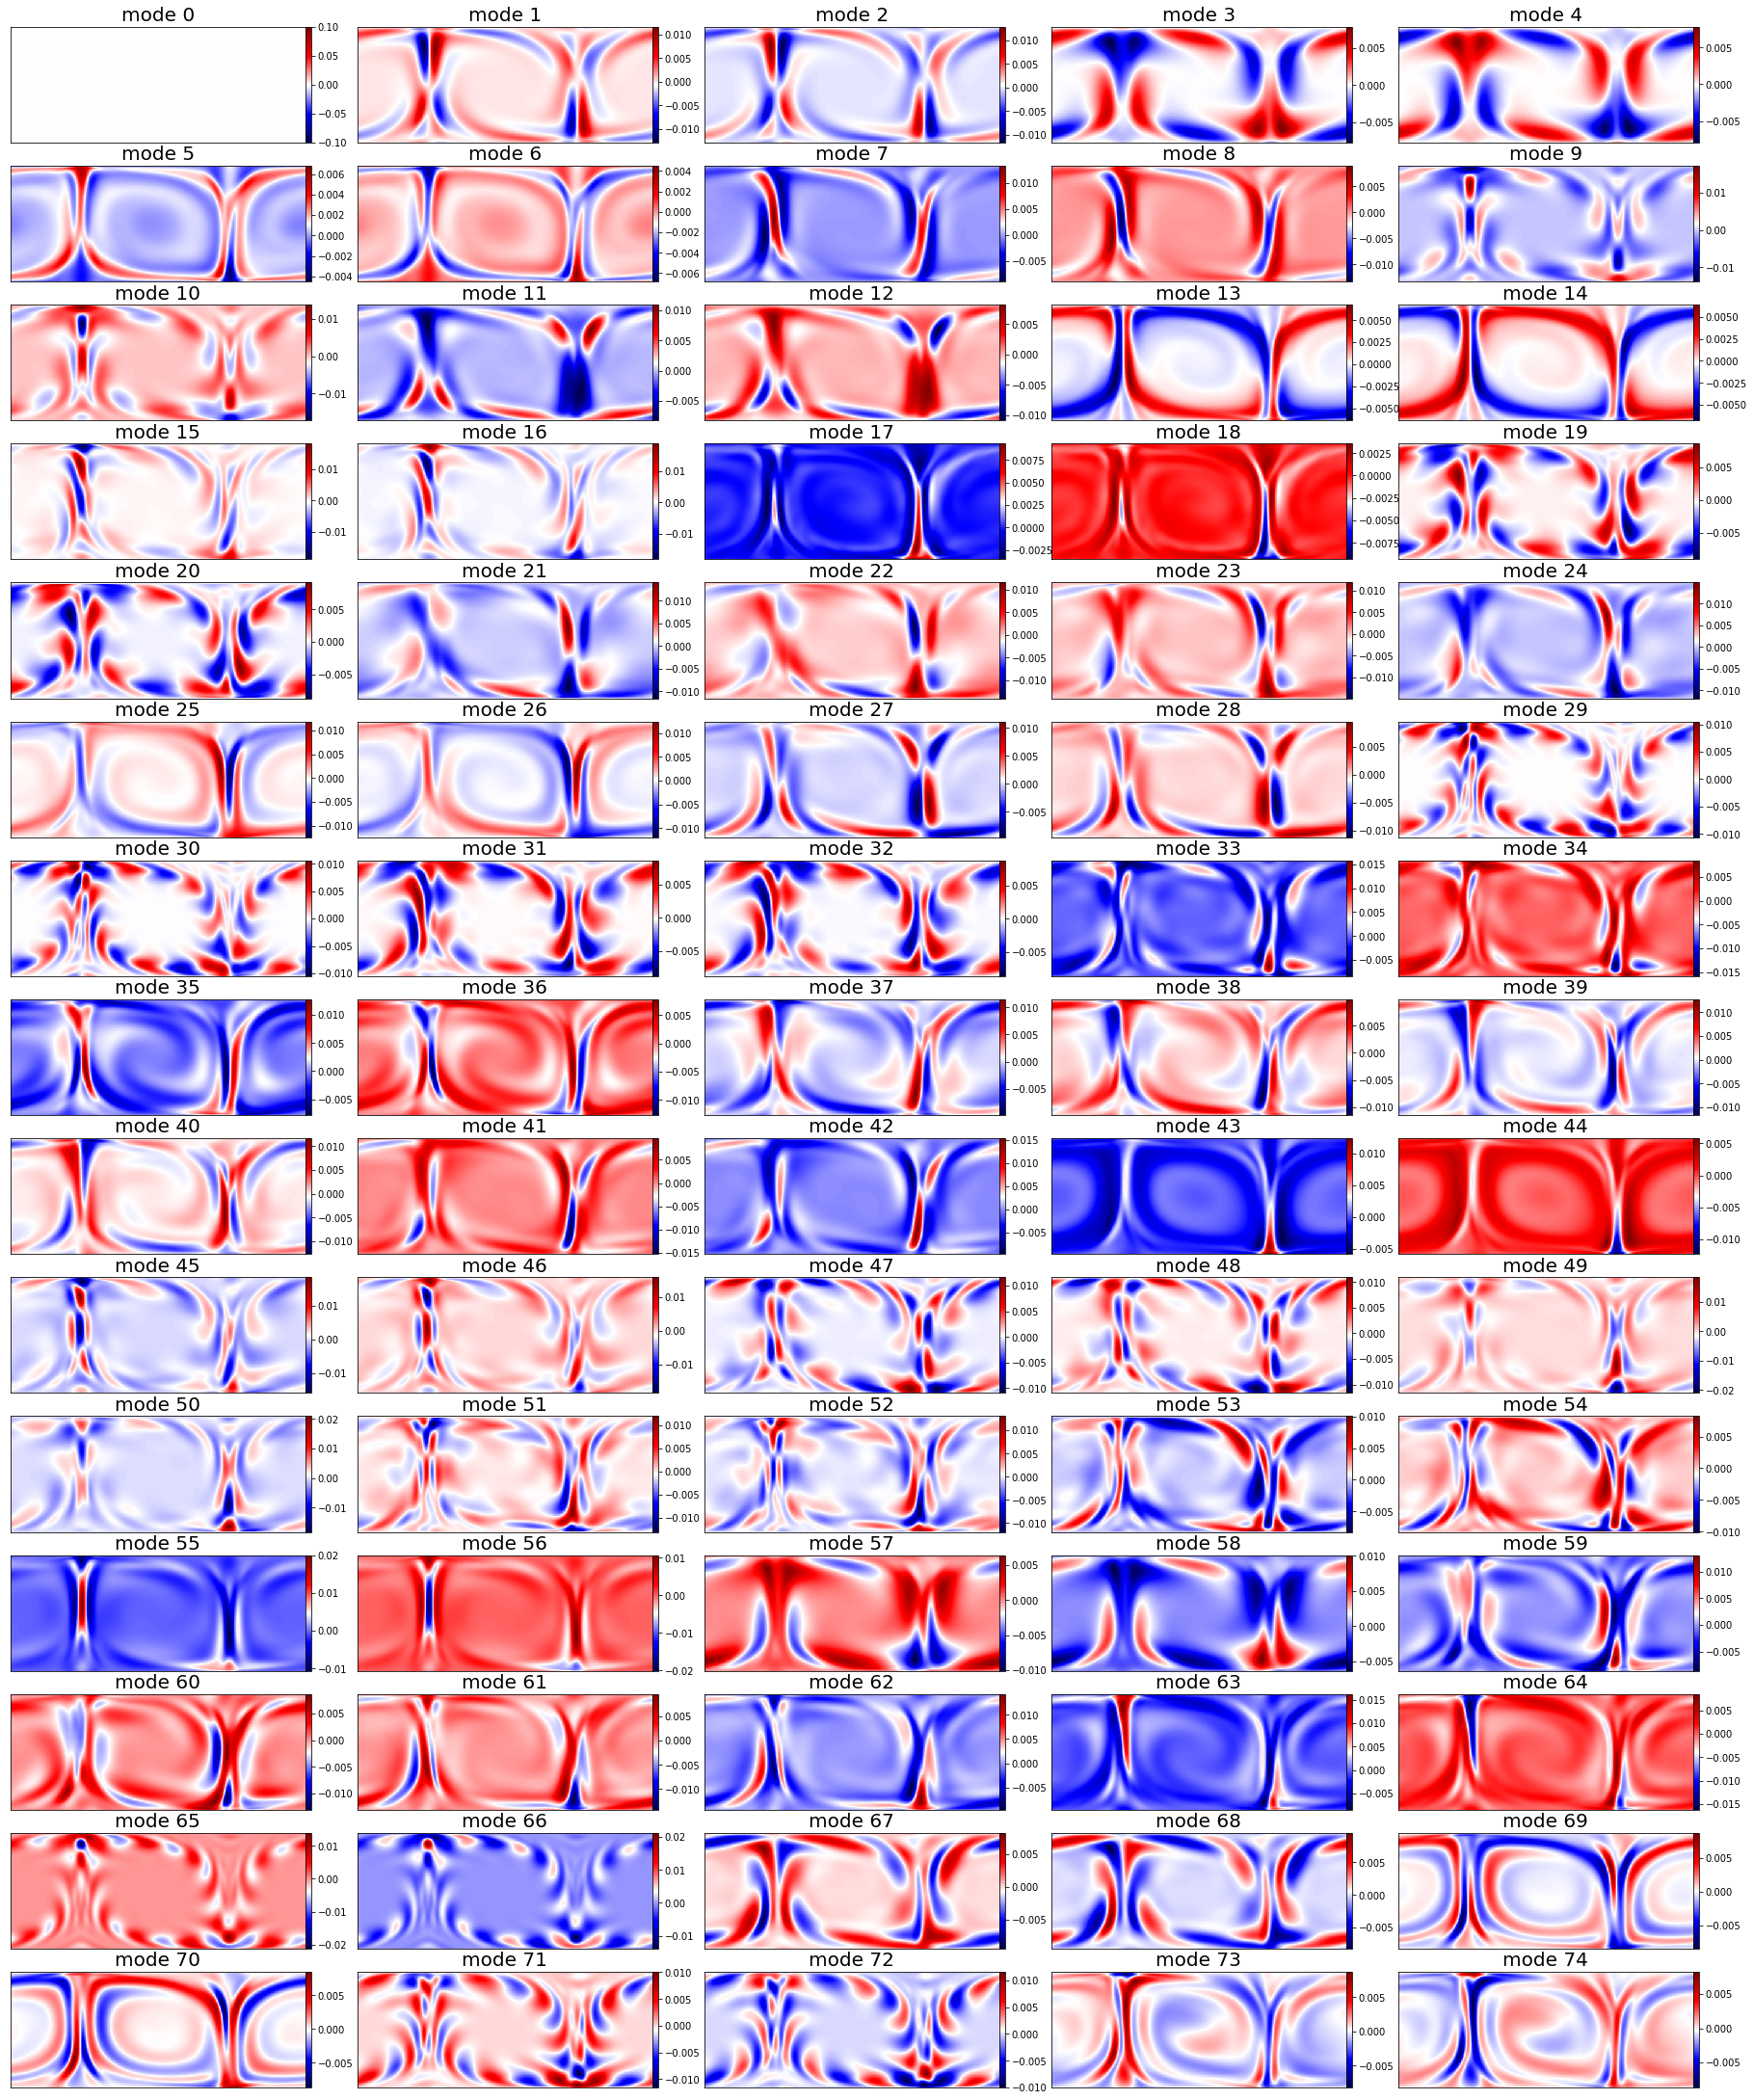

In [ ]:
value_amp_imag = dmd_ext.modes[:, cri16_idx[:Nc*Nr]].imag.T
values_imag = np.reshape(value_amp_imag, (-1, ny, nx))
# dmd_tools.plot_dmd_item(values_imag, Nr, Nc, vmin_img, vmax_img, cmap='jet', title='imag part of mode')
dmd_tools.plot_dmd_item(values_imag, Nr, Nc, cmap='seismic', title='imag part of mode',save_fig=True, png_name=osp.join(save_dir, 'Treal3.png'))

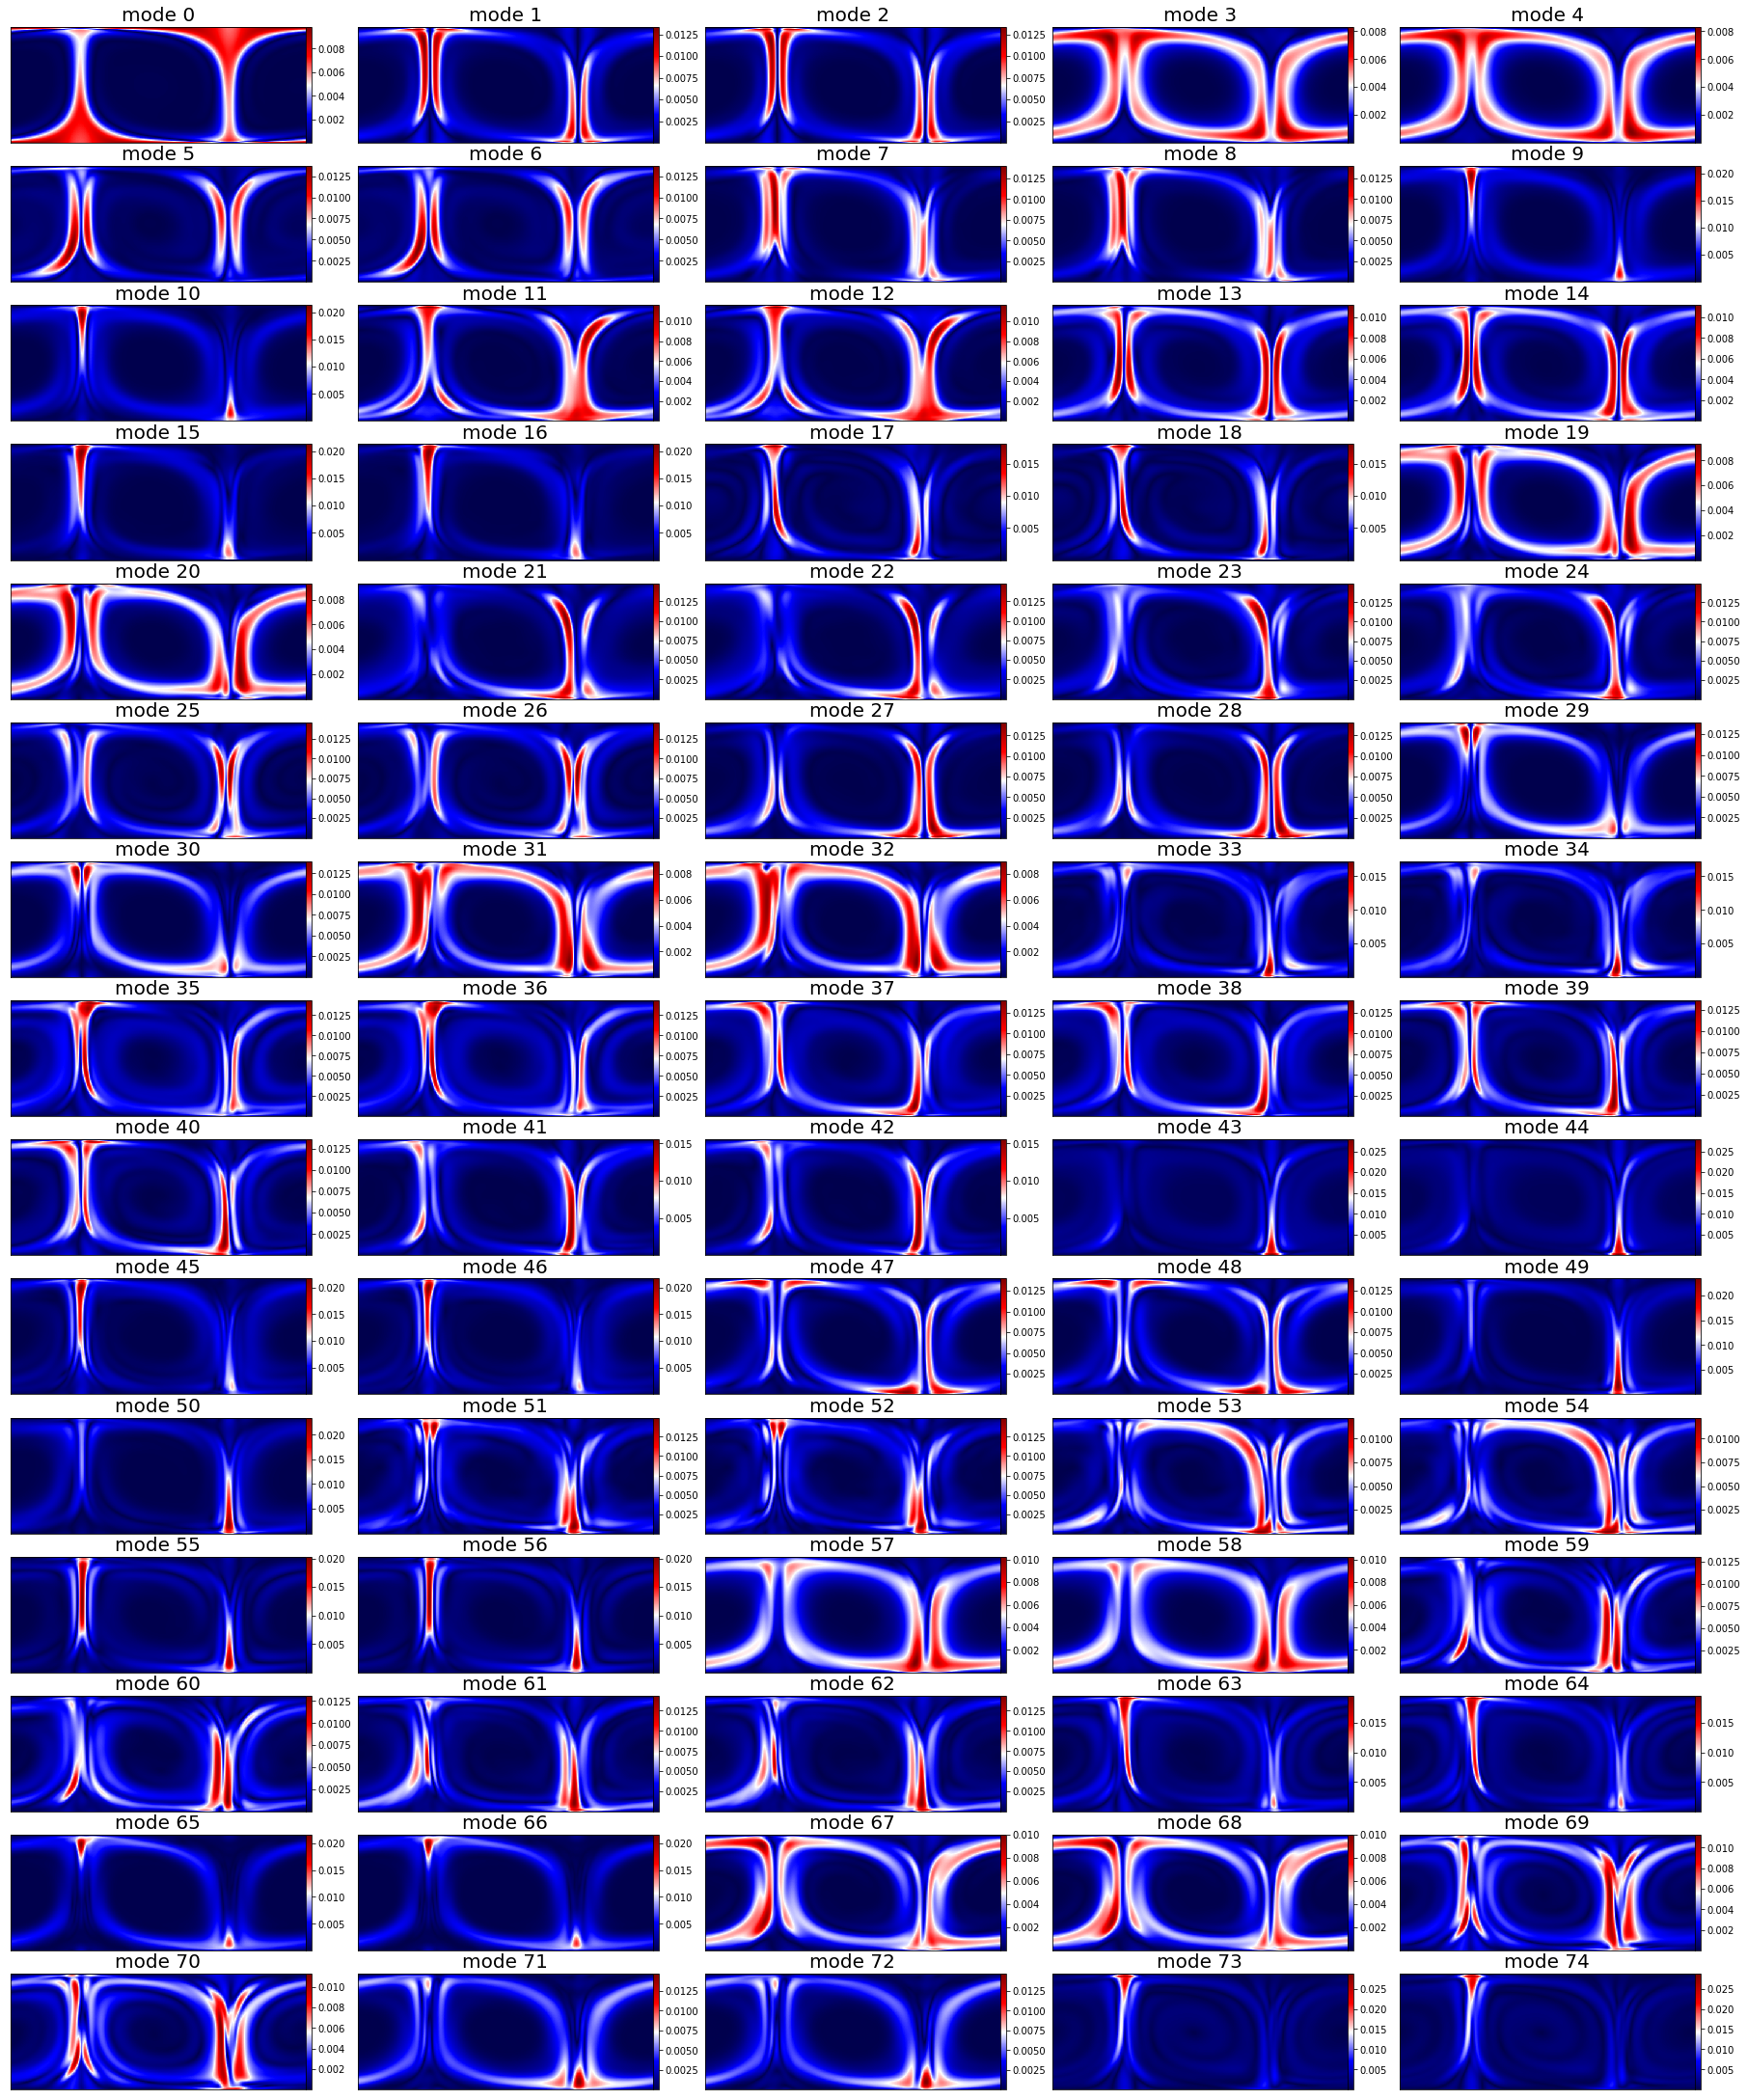

In [ ]:
value_real_amp_magnitude = np.absolute(dmd_ext.modes[:, cri16_idx[:Nc*Nr]]).T
values_magnitude = np.reshape(value_real_amp_magnitude, (-1, ny, nx))
values_magnitude_min = values_magnitude.min()
values_magnitude_max = values_magnitude.max()
# values_magnitude[values_magnitude<10e-5]=np.NaN
dmd_tools.plot_dmd_item(values_magnitude, Nr, Nc, cmap='seismic', title='magnitude of mode', save_fig=True, png_name=osp.join(save_dir,'ReImT3.png'))

In [ ]:
## Phase plot 
# nrows, ncols = 10, 5
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*2),
#                         subplot_kw={'xticks': [], 'yticks': []})
# value_real_amp = np.angle(dmd.modes[:, amp_idx[:nrows*ncols]])
# for ax, value in zip(axs.flat, np.reshape(value_real_amp, (nx, ny, -1)).T):
#     ax.imshow(value, cmap='plasma')

value_amp_phase = dmd_ext.modes[:, cri16_idx[:Nc*Nr]].T
values_phase = np.reshape(np.angle(value_amp_phase), (-1,ny, nx))
vmin_phase = values_phase.min()
vmax_phase = values_phase.max()
dmd_tools.plot_dmd_item(values_phase, Nr, Nc, vmin_phase, vmax_phase, cmap='plasma', title='phase of mode', save_fig=True, png_name=osp.join(save_dir,'T3phase.png'))

Output hidden; open in https://colab.research.google.com to view.

sort_method: cri16


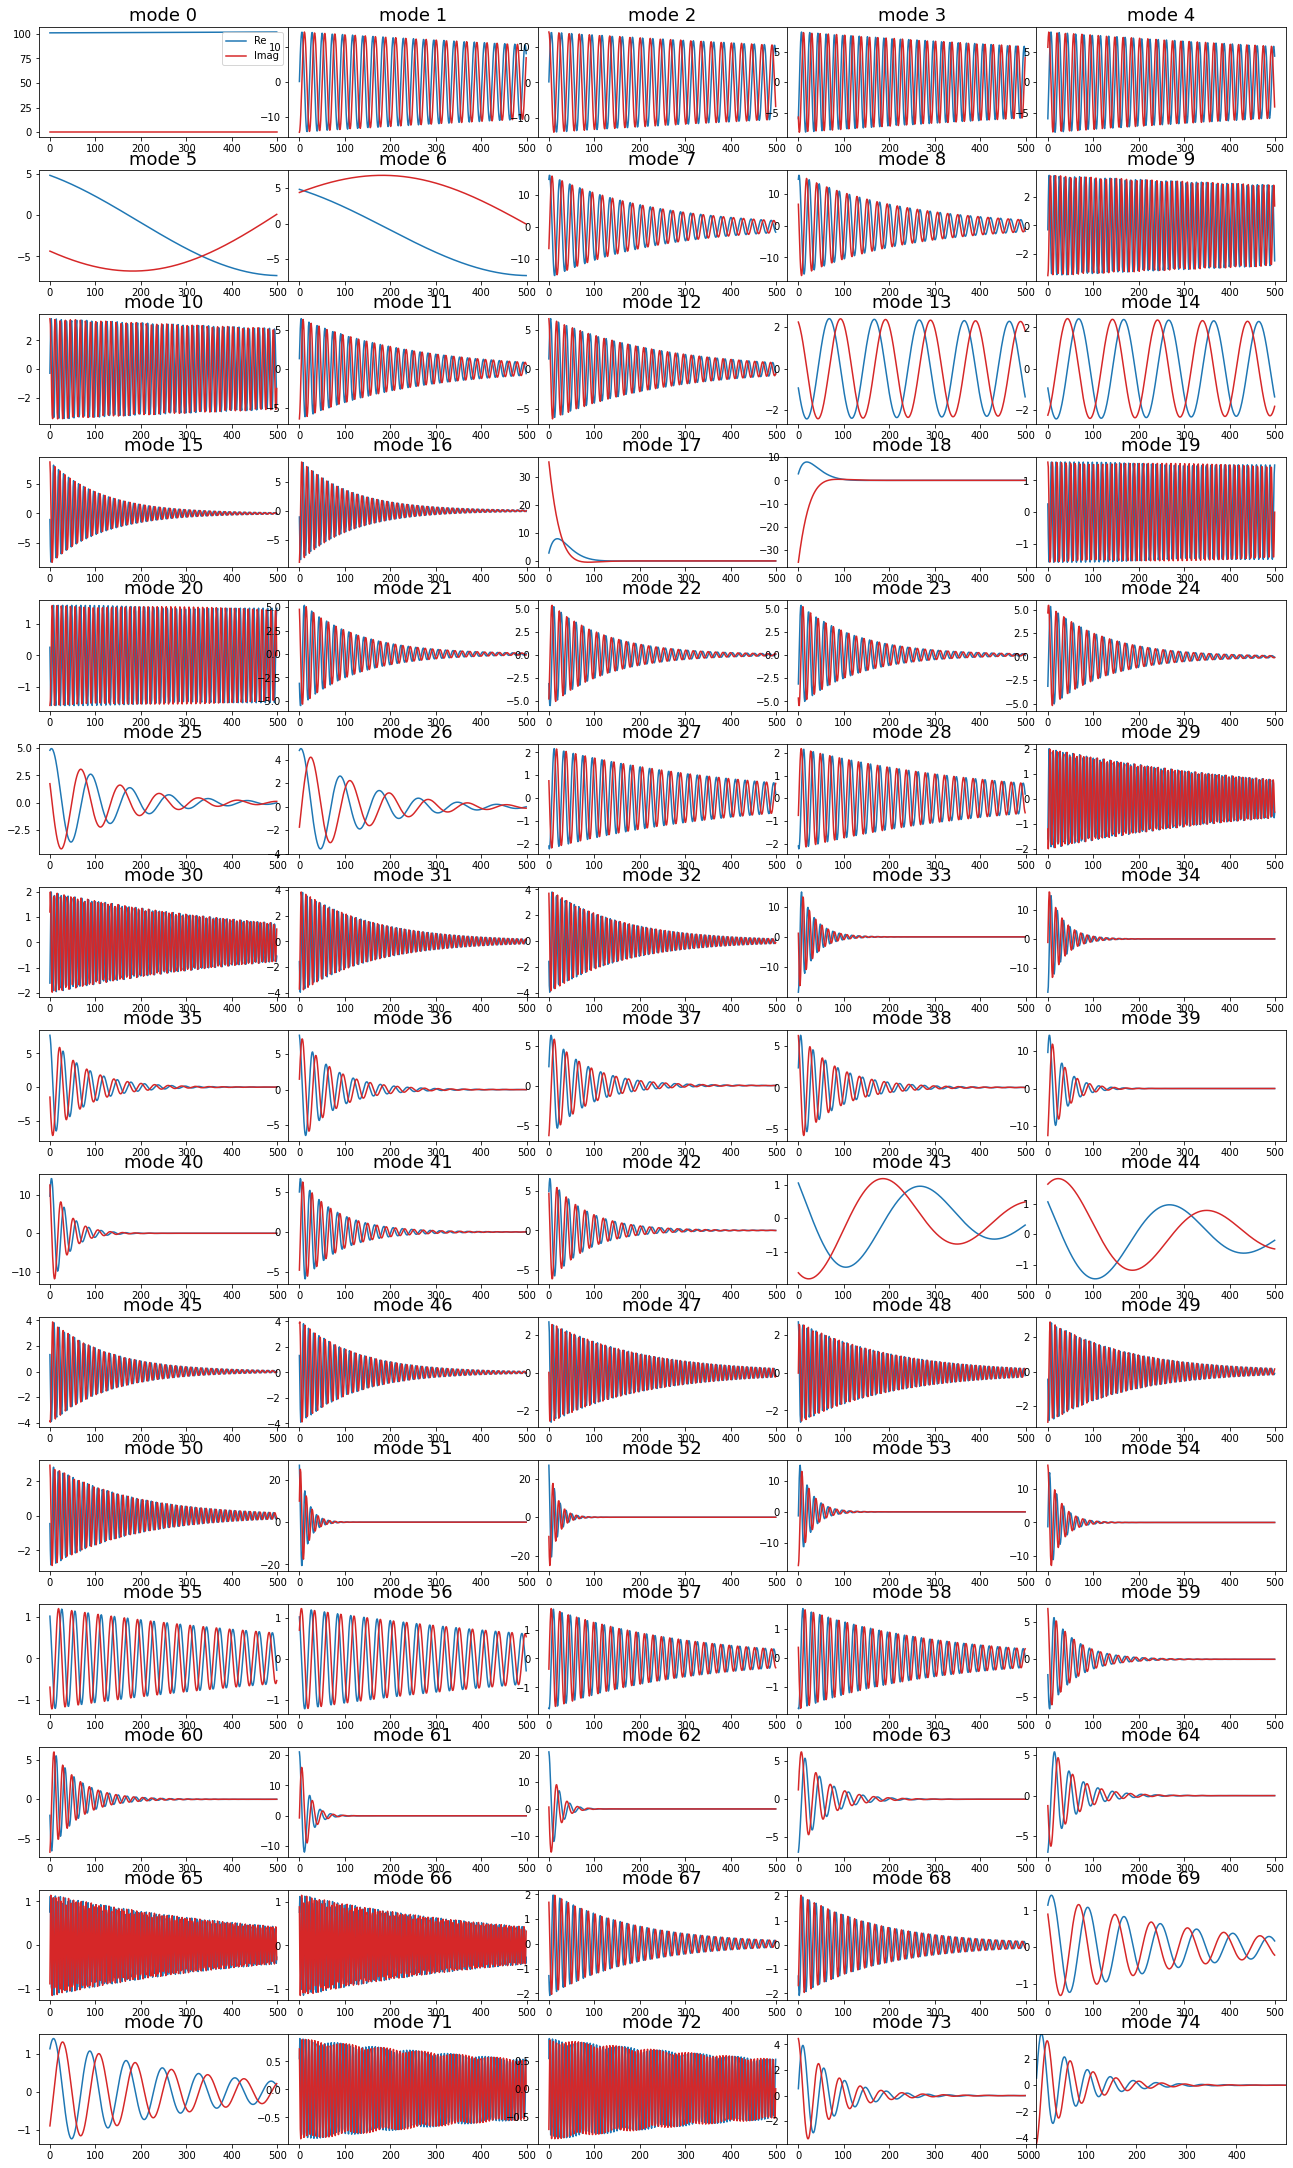

In [ ]:
dmd_ext.plot_dynamics(Nr, Nc, sort_mode='cri16', save_fig=True, png_name=osp.join(save_dir, 'RBC_T3dynamics.pdf'))

In [ ]:
# dmd_ext.plot_dynamics(Nr, Nc, sort_mode='amp', save_fig=True, png_name='gdrive/My Drive/NTF_project/RBC_dynamics.pdf')

In [ ]:
# dmd_ext.plot_dynamics(Nr, Nc, sort_mode='amp')

sort_method: cri16
test


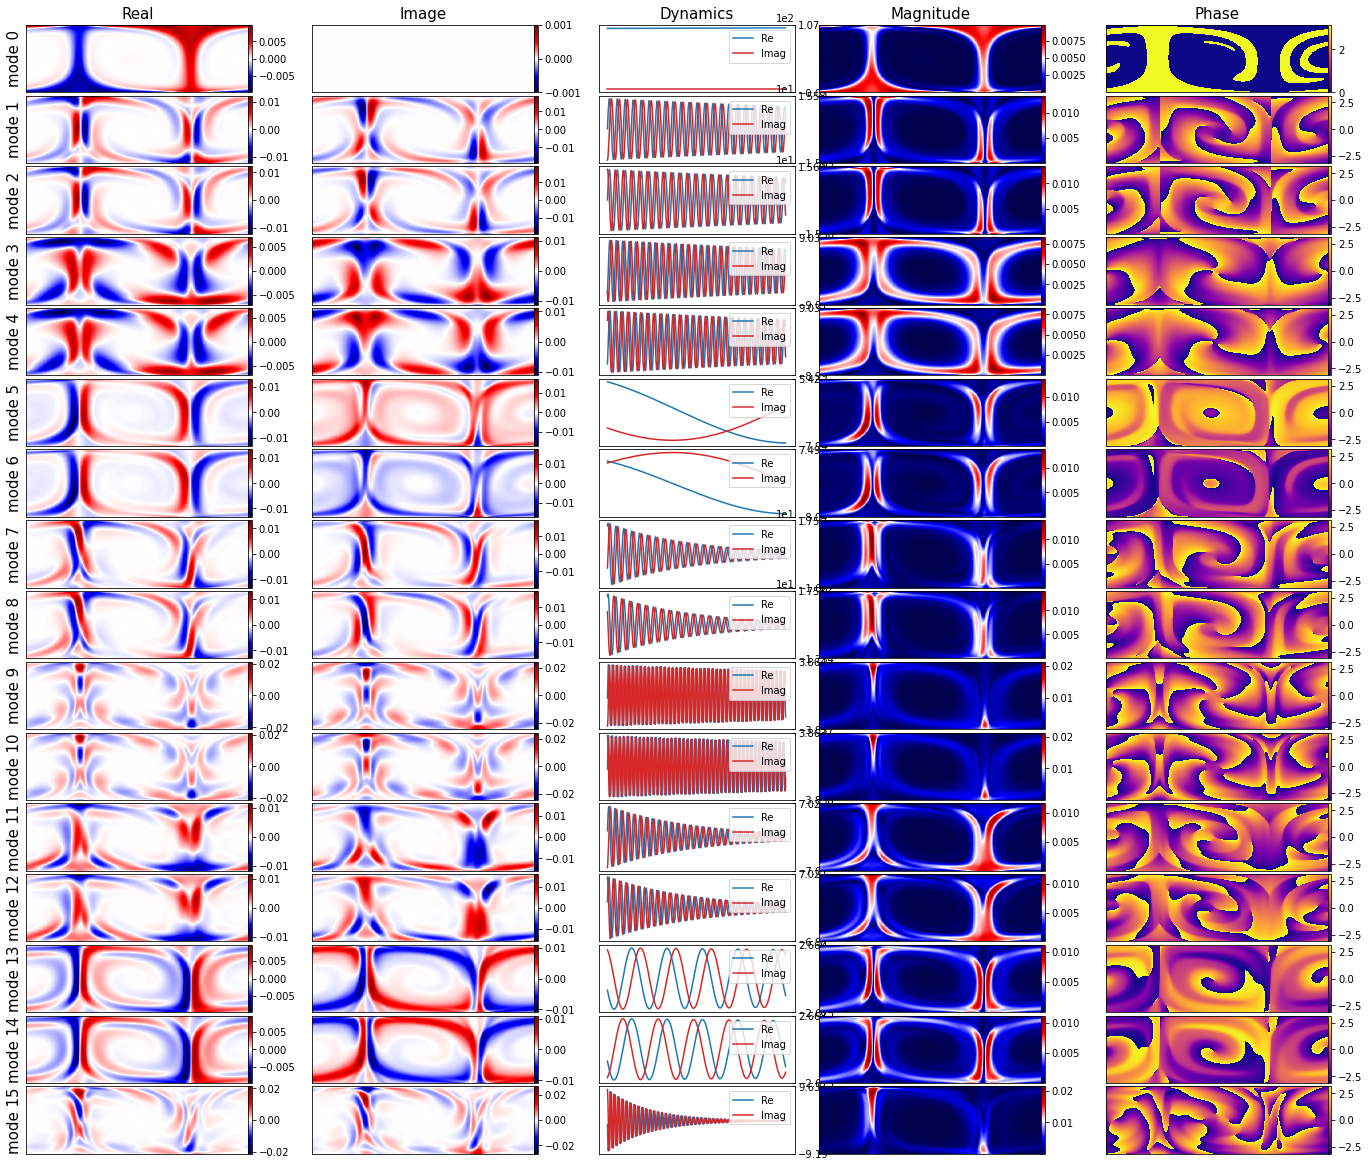

In [ ]:
dmd_ext.plot_grid([i for i in range(16)], cmap='seismic',nx=nx, ny=ny, save_fig=True, png_name=osp.join(save_dir,'T3all.png'))
# plt.savefig('gdrive/My Drive/NTF_project/all.pdf')

In [ ]:
dir_dy_mode =osp.join(save_dir,"dy_modesT3")
# modes_name = [f'modes_{j:02}' for j in range(4)]
# [comm_tools.make_dir(os.path.join(dir_dy_mode, fn)) for fn in modes_name];
mode_nums = [ f"timestep_{i:04}.png" for  i in range(500)]
dy_mode_paths =[]
# for m in modes_name:
#     mm = []
#     for j in mode_nums:
#         mm.append(os.path.join(dir_dy_mode, m,j))
#     dy_mode_paths.append(mm)



In [47]:
save_dymodes = True
if save_dymodes:
    values_coll = []
    num_modes=20
    for i, j in enumerate(cri16_idx[:num_modes]):
                
            mode_name = f'mode{i:04d}_{j:04}'
            sep_modes_base = os.path.join(dir_dy_mode, mode_name)
            comm_tools.make_dir(sep_modes_base)
            print(f"saveing mode No. {i+1}/{num_modes}")
            print(f"saving path: {sep_modes_base}")

            values = np.outer(dmd_ext.modes[:, j], dmd_ext.dynamics[j, :]).real
            values = values.reshape(ny,nx,-1)
            values = comm_tools.rescale(values)
            for k in range(values.shape[-1]):

                pic_path = os.path.join(sep_modes_base, f'modes_num{k:04}.png')
                plt.imsave(pic_path, values[:,:,k],  cmap='seismic')
            # values_coll.append(values)

saveing mode No. 1/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0000_0181
saveing mode No. 2/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0001_0182
saveing mode No. 3/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0002_0183
saveing mode No. 4/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0003_0171
saveing mode No. 5/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0004_0172
saveing mode No. 6/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0005_0203
saveing mode No. 7/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0006_0202
saveing mode No. 8/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0007_0184
saveing mode No. 9/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0008_0185
saveing mode No. 10/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0009_0139
saveing mode No. 11/20
saving path: gdrive/My Drive/NTF_project/dy_modesT3/mode0010_0140
saveing mode No. 12/20
saving 

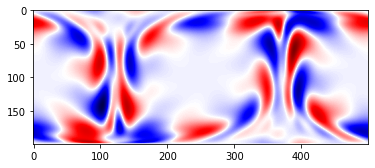

In [ ]:
if save_dymodes:
    plt.imshow(values.reshape(ny,nx,-1)[:,:,0],cmap='seismic')